In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

/opt/python/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/python/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/python/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/python/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

1.5.0


In [2]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

import pandas as pd
import numpy as np

print(pd.__version__)

Using TensorFlow backend.


0.20.3


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')



In [4]:
#read in datafile
df = pd.read_csv('train.csv', names=['comment', 'label'], header=None)
#check data format
print(df.iloc[0])
#check the labels in the dataset
df.label.value_counts()

#converts label into integer values
df['label'] = df.label.astype('category').cat.codes
#prints out dataframe
df

#creates a new column for total words in each row
df['total_words'] = df['comment'].str.count(' ') + 1
#prints the dataframe at the index of it's largest comment
print(df.loc[df.total_words.idxmax()])
#prints the length of the longest comment in the dataset
print("\nThe longest comment is " + str(df['total_words'].max()) + " words.\n")

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
df['vector'] = vectorizer.fit(df['comment'])
vectorizer.vocabulary_



comment    I would give no stars if I could. When we rece...
label                                  Complaint re: Product
Name: 0, dtype: object
comment        Been using for a week now and this morning it ...
label                                                          1
total_words                                                  191
Name: 5, dtype: object

The longest comment is 191 words.



{'would': 1551,
 'give': 764,
 'no': 1019,
 'stars': 1337,
 'if': 837,
 'could': 549,
 'When': 293,
 'we': 1507,
 'received': 1178,
 'this': 1399,
 'product': 1134,
 'it': 861,
 'was': 1500,
 'supposed': 1364,
 'to': 1415,
 'be': 404,
 'new': 1014,
 'but': 453,
 'clearly': 500,
 'used': 1468,
 'There': 266,
 'were': 1516,
 'sticky': 1346,
 'fluids': 727,
 'on': 1045,
 'the': 1387,
 'drip': 628,
 'tray': 1428,
 'Also': 37,
 'inside': 849,
 'of': 1036,
 'water': 1505,
 'reservoir': 1211,
 'smelled': 1305,
 'like': 919,
 'wet': 1517,
 'towel': 1426,
 'ran': 1161,
 'empty': 648,
 'did': 595,
 'not': 1027,
 'come': 523,
 'out': 1064,
 'clear': 498,
 'instead': 852,
 'there': 1391,
 'coffee': 513,
 'grounds': 779,
 'remaining': 1196,
 'from': 743,
 'whoever': 1526,
 'last': 896,
 'am': 345,
 'EXTREMELY': 95,
 'disappointed': 604,
 'Additionally': 35,
 'with': 1536,
 'some': 1313,
 'included': 843,
 'items': 863,
 'such': 1357,
 'as': 373,
 'count': 551,
 'cup': 560,
 'and': 350,
 'extra': 67

In [5]:
#creates bins
bins=[0,50,75, np.inf]
#generates a bin column in the dataset
df['bins']=pd.cut(df.total_words, bins=[0,25,50,75,100,125,150, np.inf], labels=['0-25', '25-50', '50-75','75-100' , '100-125', '125-150','>150'])
#prints out word distribution for the bins
word_distribution = df.groupby('bins').size().reset_index().rename(columns={0:'counts'})
print(word_distribution)
#counts the number of classes
num_class = len(np.unique(df.label.values))
y = df['label'].values
print("\nThere are a total of " + str(num_class) + " classes.")

      bins  counts
0     0-25     223
1    25-50      43
2    50-75      23
3   75-100      17
4  100-125       9
5  125-150       2
6     >150       2

There are a total of 6 classes.


In [6]:
#tokenziers words in the comment section

MAX_LENGTH = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.comment.values)
post_seq = tokenizer.texts_to_sequences(df.comment.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)




In [7]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.3)
vocab_size = len(tokenizer.word_index) + 1

In [8]:
#builds input shape
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

#prediction function
predictions = Dense(num_class, activation='softmax')(x)
#develop model
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

#prints out summary of model
model.summary()
#saves the model weights
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=10, callbacks=[checkpointer])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 128)          177152    
_________________________________________________________________
flatten_1 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2048032   
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 2,225,382
Trainable params: 2,225,382
Non-trainable params: 0
_________________________________________________________________
Train on 167 samples, validate on 56 samples
Epoch 1/10
167/167 [==============================] - 1s 3ms/step - loss: 1.8436 - acc:

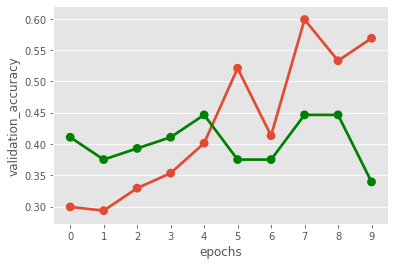

In [9]:
#plot model
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [10]:
#get prediction accuarcy
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.5104166666666666

In [11]:
#print model output
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 128)          177152    
_________________________________________________________________
flatten_1 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2048032   
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 2,225,382
Trainable params: 2,225,382
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           69200     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 69,721
Trainable params: 69,721
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           69200     
_________________________________________________________________
global

ValueError: Error when checking input: expected embedding_2_input to have shape (100,) but got array with shape (500,)